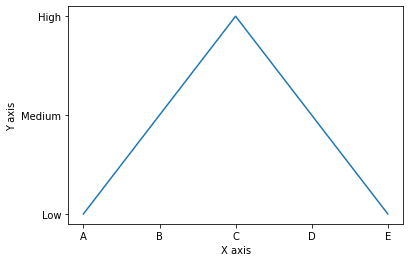

In [7]:
import matplotlib.pyplot as plt

# Define the data to be plotted
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 2, 1]

# Plot the line
plt.plot(x, y)

# Define the locations and labels for x-axis ticks
xticks = [1, 2, 3, 4, 5]
xticklabels = ['A', 'B', 'C', 'D', 'E']
plt.xticks(xticks, xticklabels)

# Define the locations and labels for y-axis ticks
yticks = [1, 2, 3]
yticklabels = ['Low', 'Medium', 'High']
plt.yticks(yticks, yticklabels)

# Add labels to the plot
plt.xlabel('X axis')
plt.ylabel('Y axis')

# Show the plot
plt.show()


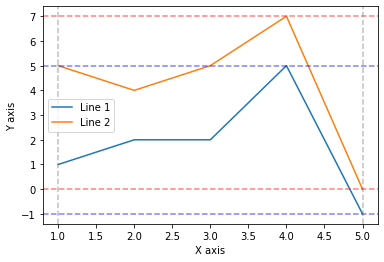

In [6]:
import matplotlib.pyplot as plt

# Define the data to be plotted
x = [1, 2, 3, 4, 5]
y1 = [1, 2, 2, 5, -1]
y2 = [5, 4, 5, 7, 0]

# Find the lowest and highest values
x_min, x_max = min(x), max(x)
y1_min, y1_max = min(y1), max(y1)
y2_min, y2_max = min(y2), max(y2)

# Plot the first line
plt.plot(x, y1, label='Line 1')

# Plot the second line
plt.plot(x, y2, label='Line 2')

# Project the lowest and highest values on the horizontal and vertical axes
plt.axhline(y=y1_min, color='b', linestyle='--', alpha=0.5)
plt.axhline(y=y1_max, color='b', linestyle='--', alpha=0.5)
plt.axhline(y=y2_min, color='r', linestyle='--', alpha=0.5)
plt.axhline(y=y2_max, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=x_min, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=x_max, color='gray', linestyle='--', alpha=0.5)

# Add labels and legend to the plot
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()

# Show the plot
plt.show()


In [ ]:
import numpy as np
import math
import roboticstoolbox as rtb
from roboticstoolbox import ET, ETS, ERobot
from sympy import Matrix, nsimplify
from spatialmath.base import *
from spatialmath import SE3

pi = math.pi
#d*Rz*a*Rx

Base = SE3(-0.116,0,0)
#rtb.robot.RevoluteDH(a=-0.116),
link0 = rtb.robot.RevoluteDH(d=0.0294, alpha=pi/2, qlim=np.array([-pi/2,pi]),m=0.33, r=[-8.2*1e-3,-1.6*1e-4,-7.02*1e-3], I=[2.05*1e-3,1.58*1e-3,7.1*1e-4], Jm=0.0002)
link1 = rtb.robot.RevoluteDH(a=0.23, qlim=[0,pi], m=0.201, r=[1.64*1e-2,-2.96*1e-3,-1.12*1e-6], I=[2.45*1e-3,2.27*1e-3,4.55*1e-4], Jm=0.0002)# alpha=pi),
link2 = rtb.robot.RevoluteDH(d=-0.00286, a=0,alpha=-pi/2, qlim=[0,pi],flip=True, m=0.279, r=[0.0,7.76*1e-3,0.0], I=[1.28*1e-3,1.09*1e-3,7.06*1e-4], Jm=0.0002)
link3 = rtb.robot.RevoluteDH(d=0.17213,a=0.0019, alpha=pi/2, qlim=[0,pi], m=0.222, r=[7.76*1e-3,0.0,0.0], I=[1.28*1e-3,1.09*1e-3,7.06*1e-4], Jm= 3.3*1e-5)
link4 = rtb.robot.RevoluteDH(a=0.0438, alpha=-pi/2, qlim=[-pi/2,pi], m=0.099, r=[6.54*1e-3,0.0,-2.08*1e-4], I=[6.05*1e-4,4.5*1e-4,1.96*1e-4], Jm= 3.3*1e-5)#,
link5 = rtb.robot.RevoluteDH(offset=-pi/2, alpha=0, qlim=[-pi,pi],m=0.09, r=[-1.045*1e-2,1.37*1e-4,-9.97*1e-5], I=[5.056*1e-3,3.1*1e-3,1.96*1e-3], Jm= 3.3*1e-5)

robot = rtb.robot.DHRobot([link0,link1,link2,link3,link4,link5],name="PROCaN", manufacturer="Vitor Domingues", base = Base)
robot.addconfiguration_attr("qf", [0.0, 0.0, 1.57, 0, 0, 0])
robot.addconfiguration_attr("q30", [0.0, pi/6, pi/3, 0, 0, 0])
robot.addconfiguration_attr("q05", [0.0, 0.5, 0.5, 0.5, 0, 0])
#print(robot)

In [ ]:
import math

def tail_rotor_info(mass, main_rotor_velocity):
    # Constants
    main_rotor_diameter = 8.0  # meters
    tail_rotor_diameter = 1.5  # meters
    distance_to_tail_rotor = 5.0  # meters
    tail_rotor_efficiency = 0.7  # dimensionless
    air_density = 1.225  # kg/m^3

    # Calculate main rotor thrust
    main_rotor_thrust = (mass*9.81) / math.cos(math.atan(distance_to_tail_rotor/main_rotor_diameter))
    # Calculate tail rotor thrust
    tail_rotor_thrust = main_rotor_thrust * (tail_rotor_diameter/main_rotor_diameter) * tail_rotor_efficiency
    # Calculate tail rotor velocity
    tail_rotor_velocity = math.sqrt((2*tail_rotor_thrust) / (air_density*math.pi*(tail_rotor_diameter/2)**2))

    return distance_to_tail_rotor, tail_rotor_velocity

# Example usage
mass = 1000  # kg
main_rotor_velocity = 100  # m/s
distance, velocity = tail_rotor_info(mass, main_rotor_velocity)
print("Distance to tail rotor: ", distance, " meters")
print("Tail rotor velocity: ", velocity, " m/s")


In [ ]:
#COMPUTANDO CONFIGURAÇÃO DE TORQUE MÁXIMO:
import numpy as np
import matplotlib.pyplot as plt
import roboticstoolbox as rtb

# Define the start and end configurations
q0 = np.array([0, 0, np.pi/2, 0, 0, 0])
q1 = np.array([0, np.pi, -np.pi/2, 0, np.pi/2, 0])
#torque = []
# Create a trajectory from the start to end configurations
traj = rtb.jtraj(q0, q1,100)
qtraj = []
qdtraj = []
# Calculate the torqueeration at each configuration
torque = np.zeros((len(traj), 6))
for i in range(len(traj)):
    q = traj.q[i, :]
    qtraj.append(q)
    
    torque[i, :] = robot.rne(q,4.74+np.zeros((6,)),1+np.zeros((6,)))

robot.plot(traj.q, backend='pyplot', movie='procan.gif')
s = 1

max_values = np.amax(torque, axis=0)
max_linhas = np.argmax(torque, axis=0)
min_values = np.amin(torque, axis=0)
min_linhas = np.argmin(torque, axis=0)
print(max_values,max_linhas)

plt.scatter(range(100), torque[:, 0], s=s,c='r')
plt.scatter(range(100), torque[:, 1], s=s,c='g')
plt.scatter(range(100), torque[:, 2], s=s,c='b')
plt.scatter(range(100), torque[:, 3], s=s,c='c')
plt.scatter(range(100), torque[:, 4], s=s,c='m')
plt.scatter(range(100), torque[:, 5], s=s,c='y')
plt.scatter(max_linhas[0], max_values[0], s=5,c='r')
plt.scatter(max_linhas[1], max_values[1], s=5,c='g')
plt.scatter(max_linhas[2], max_values[2], s=5,c='b')
plt.scatter(max_linhas[3], max_values[3], s=5,c='c')
plt.scatter(max_linhas[4], max_values[4], s=5,c='m')
plt.scatter(max_linhas[5], max_values[5], s=5,c='y')
plt.scatter(min_linhas[0], min_values[0], s=5,c='r')
plt.scatter(min_linhas[1], min_values[1], s=5,c='g')
plt.scatter(min_linhas[2], min_values[2], s=5,c='b')
plt.scatter(min_linhas[3], min_values[3], s=5,c='c')
plt.scatter(min_linhas[4], min_values[4], s=5,c='m')
plt.scatter(min_linhas[5], min_values[5], s=5,c='y')

#DECIDIR ENTRE AS OPÇÕES DE CONTROLE: CONSTANT,S-SHAPED, 
plt.xlabel('Tempo (s)')
plt.ylabel('Torque (N.m)')
plt.title('Torque na rota braço recolhido-estendido')
plt.show()

In [2]:
import numpy as np
import roboticstoolbox as rtb
from roboticstoolbox import DHRobot, SerialLink
pi = np.pi

d = 0.0
a = -0.116
alpha = 0.0
theta = 0.0

lBase = rtb.robot.RevoluteDH(a = a, d=0.0294, alpha=0, qlim=np.array([-pi/2,pi]),m=2.273, Jm=0.0002)
base = DHRobot([lBase])

plataforma = SerialLink([base])

q = np.array([pi])
qd = np.array([4.7])
qdd = np.array([0.0])

grav = np.array([0,0,0])
tau = base.rne(q,qd,qdd,grav)
tau


array([0.])